In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa
from tqdm import tqdm

import params as params
import model as model

In [2]:
class ESC_dataset(nn.Module):
    def __init__(self, df, path):
        self.df = df
        self.path = path
        self.data_list = []
        for file_name in tqdm(df['filename'].values):
            wav, sr = torchaudio.load(self.path + file_name)
            wav = torchaudio.transforms.Resample(orig_freq = sr, new_freq = 22050)(wav)
            mel_spec = torchaudio.transforms.MelSpectrogram(sample_rate = 22050, n_fft = 1024, hop_length = 512, n_mels = 128)(wav)
            mel_spec = torchaudio.transforms.AmplitudeToDB()(mel_spec)
            self.data_list.append(mel_spec)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        return self.data_list[idx]

In [3]:
df = pd.read_csv('../dataset/ESC-50-master/meta/esc50.csv')
file_path = '../dataset/ESC-50-master/audio/'
dataset = ESC_dataset(df, file_path)
variances = []
for wav in dataset:
    variances.append(wav)
variances = torch.var(torch.stack(variances))


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:09<00:00, 220.59it/s]


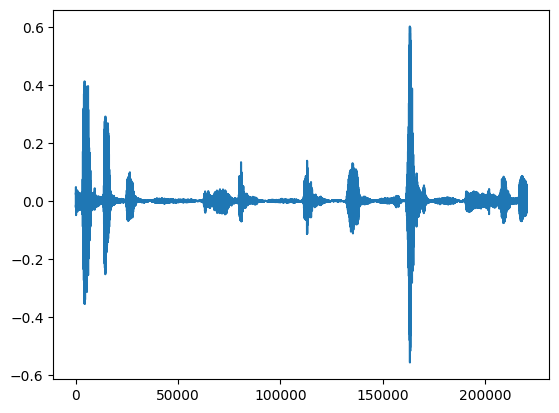

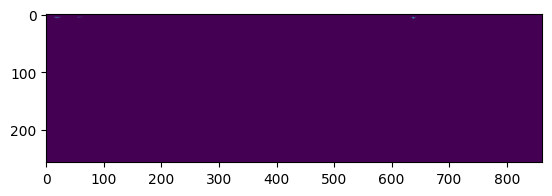

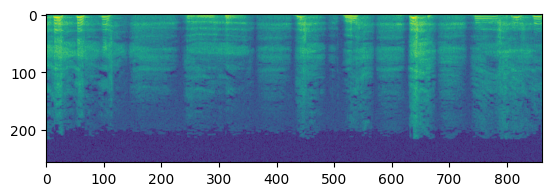

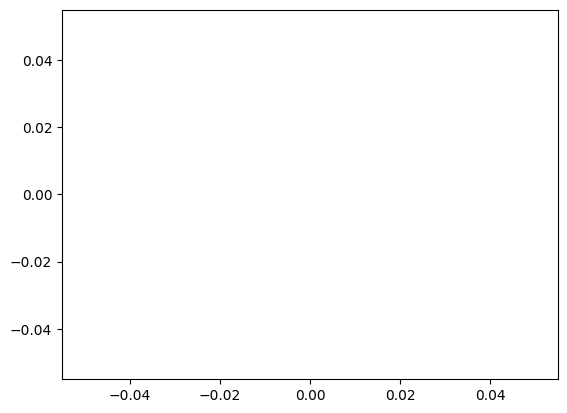

In [15]:
wav, sr = torchaudio.load('../dataset/ESC-50-master/audio/5-263775-A-26.wav')
plt.figure()
plt.plot(wav[0,:].numpy())
spec = torchaudio.transforms.Spectrogram(n_fft = 512, hop_length = 256)(wav)
plt.figure()
plt.imshow(spec[0,:,:].numpy())
spec_DB = torchaudio.transforms.AmplitudeToDB()(spec)
plt.figure()
plt.imshow(spec_DB[0,:,:].numpy())
grim_wav = torchaudio.transforms.GriffinLim(n_fft = 512, n_iter = 50, hop_length = 256)(spec_DB)
plt.figure()
plt.plot(grim_wav[0,:].numpy())